<font face="Calibri" size="2"> <i>SBAE - Notebook Series - Part II, version 0.2,  May 2023. Andreas Vollrath, UN-Food and Agricultural Organization, Rome</i>
</font>

![title](images/header.png)

# II - Sample Design 
### Creation of point samples for subsequent time-series extraction and analysis
-------

#### **Introduction**

The base for the eSBAE approach is a dense grid that captures change at a sufficient level of confidence. A systematic sampling design shall be be employed. This notebook provides the functionality to create such a grid over the given AOI (defined in Notebook 1). 

Two grid shapes are available, i.e. squared or hexagonal grid. In addition, it is necessary to determine the size of each grid cell as well as the projection.

#### **Squared grid**

Squared grids are a simple way of creating a grid. They are in use for various geospatial applications. The grid size of the squared grid is selected in meters, defining the single border length of each grid cell.

#### **Hexagonal grid**

Lately, hexagonal grids are adapted in National Forest Monitoring Sytems as they possess some particular characteristics. Foremost, they reduce the error on area, but they also assure that each point within the grid cell is more or less at the same distance to the center. Indeed, the ideal shape under that criteria would be a circle. It is however not possible to create a consistent grid of circles. The hexagon is the polygon that comes closest to this criteria, while still being able to provide a consistent grid.

The notebook provides a simplified interface to the dggrid software library from [Southern Oregon University](https://www.discreteglobalgrids.org/software/). 
DGGRID holds code to generetate standardized hexagonal grids based on a *Discrete Global Grid System (DGGS)*  with a set of predefined resolutions for specific projections optimized for equal area.

It is important to understand that DGGRID has a **fixed set of resolutions** that should be selected from column *res* in the below table (You need to check the manual for other resolutions if you select a different projection than the ISEA3H).

For advanced usage it is recommended to consult the [manual](https://webpages.sou.edu/~sahrk/docs/dggridManualV70.pdf).

![title](images/dggrid_isea3h_ap3_res_table.png)

#### **Sampling strategies**

The notebook allows to select from 2 sampling strategies within each grid cell, *centroid* and *random*. The centroid will take the centre point according to the projection selected, while the random option will randomly distribute a set number of points within the grid cell.


#### ***Projections***

When creating samples, an important consideration is the projection used. Projections always exhibit distortions with regard to the actual sphere-like shape of the Earth. As our aim is to give each sample the same weight in terms of area representativeness, we shall select a projection that is optimised for **equal area**. 

##### **Squared grid projections**

In the table below you can find some examples of global equal area projections to select from. The information is taken from an article from Yildrim & Kaya 2008 and can be found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3790990/#:~:text=The%20level%20of%20distortion%20can,compared%20to%20equal%2Darea%20maps). **Note** that the commonly used Lat/Lon projection (EPSG:4326) **does** contain distortions that shall be avoided.

| **Projection**    | **Code**       |
| -------------     |----------------|
| Behrmann          | ESRI:54017     | 
| Bonne             | ESRI:54024     | 
| Sinusoidal        | ESRI:54008     |


##### **Hexagonal grid projections and grid size**

By default, the ISEA3H projection is used. Consult the [dggrid manual](https://webpages.sou.edu/~sahrk/docs/dggridManualV70.pdf) for further projections options. 

### 1 - Import libraries

In [1]:
import ee
# initialize EE    
try:
    ee.Initialize()
except:
    ee.Authenticate()
    ee.Initialize()
    
from sampling_handler import SampleDesign

/usr/local/share/jupyter/kernels/venv-eSBAE_notebooks/venv/lib/python3.10/site-packages/bfast/__init__.py:10: UserWarning: cupy is not available in this environment, GPU fonctionnalities won't be available
  warn("cupy is not available in this environment, GPU fonctionnalities won't be available")


### 2 - Set parameters for SampleDesign

In the below cell we initialize the SampleDesign Class, definining the necessary parameters:

1. Grid shape: This defines which shape the underlying systematic grid shall have. Choices are squared or hexagonal. 
2. Sampling strategy: Here it is defined if the samplng point is set in the centre or at a random point within each grid cell.
3. Grid projection (as epsg/esri code): As described above, projection is an important part when creating the grid. However, equal area projections are not the most commonly used projections. The routine is able to use a different grid system internally for creating the grid and/or placing the centroid. Note that when having selected a hexagonal grid, this projection is only being used for the placement of the centroid.
4. Output projection: This will define the projection of the final output file, independent of the projection the grid was defined. For this, it can also be a projection that is not ideal for the creation of sampling grids such as EPSG:4326 in Lat/Long.


In [2]:
esbae = SampleDesign(
    
    # set your project's name (NEEDS to be the same as in notebook 1)
    # no space allowed, use _ instead
    project_name='esbae_project_Jan25',
    
    # defines the underlying grid, 
    # choices: 'squared', 'hexagonal'
    shape='hexagonal',              
    
    # defines where the sample is placed within the grid, 
    # choices: 'random', 'centroid'
    strategy='centroid',          
    
    # defines the projection in which the grid is generated,
    # for hexagonal it applies to the centroid calculation only, as dggrid uses its own projection
    grid_crs="ESRI:54017",
    
     # defines the projection in which the grid is saved
    out_crs='EPSG:4326',
    
    # This is in case you haven't run notebook 1 and want to directly start from here
    # aoi = ee.FeatureCollection('my_ee_feature_collection')
)

INFO: Using existing project directory at /home/sepal-user/module_results/esbae/esbae_project_Jan25
INFO: Using existent config file from project directory /home/sepal-user/module_results/esbae/esbae_project_Jan25


### 3 - Create the grid

Another important aspect is the grid size. **NOTE** that the grid size is selected differently for squared and hexagonal grids. 
A squared grid is simply defined by the distance between each point (which is the same as a single border length of the underlying grid).

The hexagonal grid, instead, relies on a hierarchical system and has fixed resolutions (see Internode spacing in the above table). In addition, it uses a very specific projection optimized for equal area projections using hexagons. 

In [3]:
# Those parameters apply to squared grid only (otherwise ignored)
esbae.squared_grid_size = 5000

# Those parameters apply to hexagonal grid only
esbae.dggrid_resolution = 11     # this relates to the res column from the table above
esbae.dggrid_projection = 'ISEA3H'

# generation of grid
c, p = esbae.generate_samples(upload_to_ee=True, save_as_ceo=True)

INFO: Verifying parameter settings...
INFO: Creating hexagonal grid...
INFO: Grid cells are saved locally.
INFO: Point samples are saved locally as GeoPackage and CEO file.
INFO: Grid cells are being uploaded to GEE. This may take a while...
INFO: Point samples are being uploaded to GEE. This may take a while...
INFO: Verifying parameter settings...


### 4 - Plot hexagonal grid and save figure

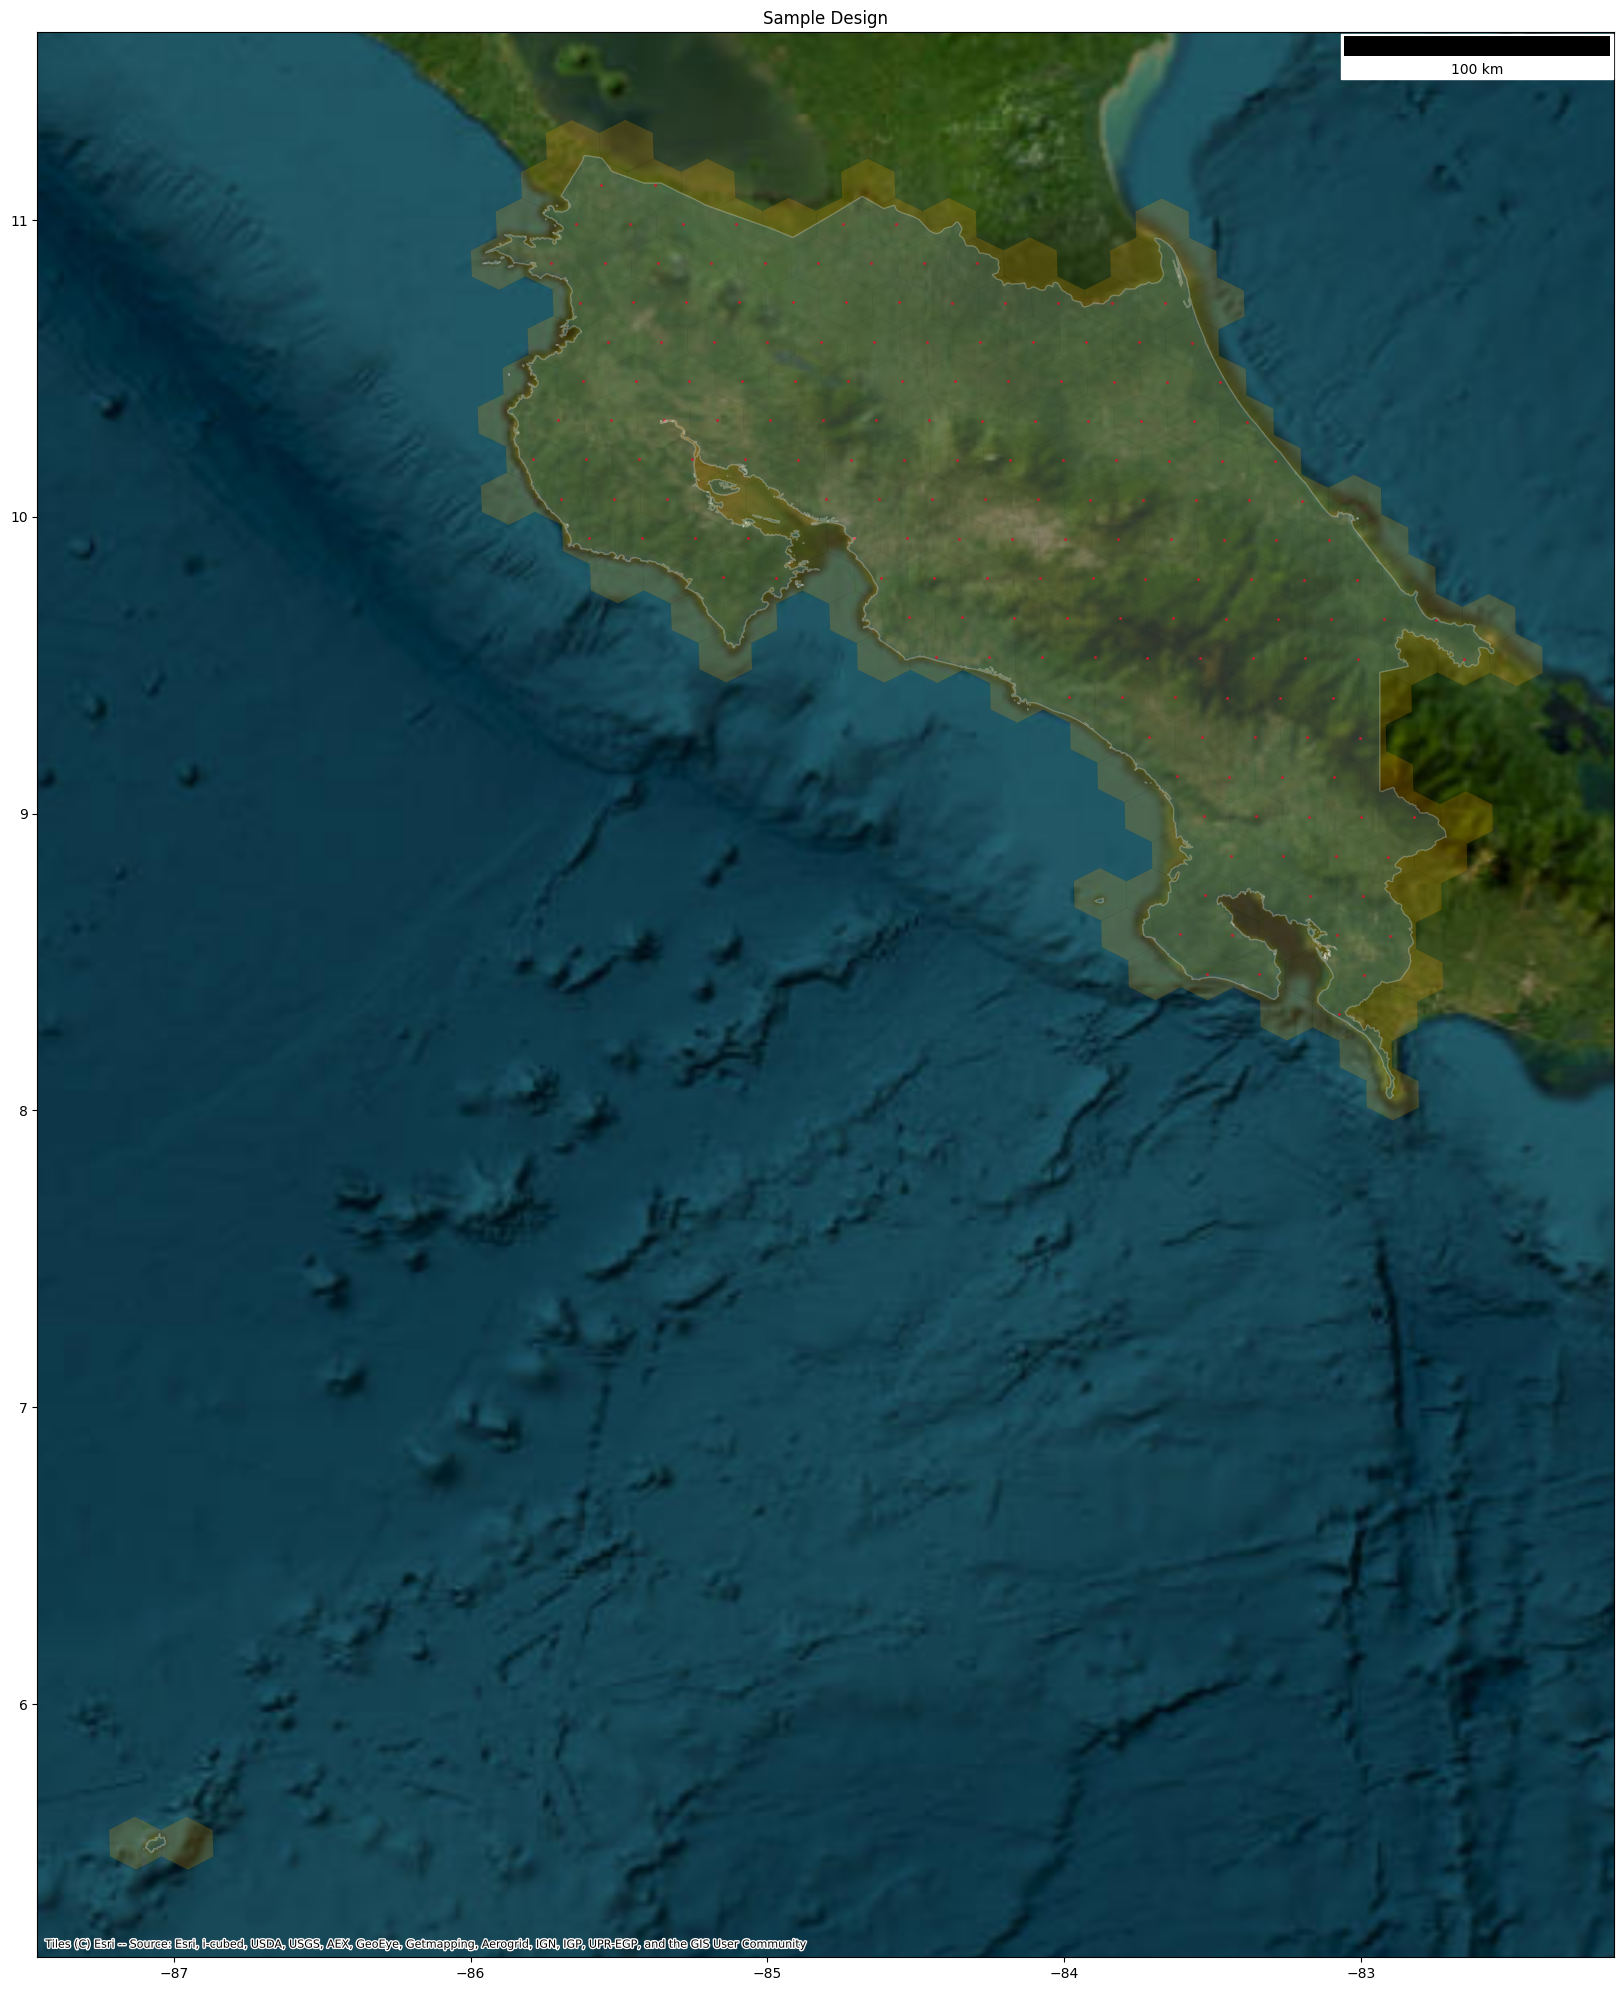

In [4]:
esbae.plot_samples()